In [1]:
import jax
jax.config.update("jax_enable_x64", True)
# jax.config.update('jax_platform_name', 'cpu')
# jax.config.update("jax_debug_nans", True)
# jax.config.update("jax_disable_jit", True)
import numpy as np
import jax.numpy as jnp
import os
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib widget

In [2]:
## these are the main packages for background evolution and perturbation evolution
from pylinger_background import evolve_background
from pylinger_perturbations import evolve_perturbations

In [8]:
## Set the Cosmological Parameters
Tcmb    = 2.7255            # CMB temperature today in K
YHe     = 0.248             # Helium mass fraction
Omegam  = 0.3099            # Total matter density parameter
Omegab  = 0.0488911         # Baryon density parameter
Omegac  = Omegam - Omegab   # Cold dark matter density parameter
w_DE_0  = -0.99             # Dark energy equation of state parameter today
w_DE_a  = 0.0               # Dark energy equation of state parameter time derivative
cs2_DE  = 1.0               # Dark energy sound speed squared
num_massive_neutrinos = 1   # Number of massive neutrinos (must be 1 currently)
mnu     = 0.06              # Sum of neutrino masses in eV 
Neff    = 2.046             # Effective number of ultrarelativistic neutrinos
                            # -1 if massive neutrino present
standard_neutrino_neff=Neff+num_massive_neutrinos
h       = 0.67742           # Hubble constant today in units of 100 km/s/Mpc
A_s     = 2.1064e-09        # Scalar amplitude of the primordial power spectrum
n_s     = 0.96822           # Scalar spectral index
k_p     = 0.05              # Pivot scale in 1/Mpc

# modes to sample
nmodes = 64                 # number of modes to sample
kmin = 1e-3                 # minimum k in 1/Mpc
kmax = 1e+0                 # maximum k in 1/Mpc
aexp = 1.0                  # scale factor at which to evaluate the power spectrum

In [9]:
# insert parameters into a dictionary
param = {}
param['Omegam']  = Omegam
param['Omegab']  = Omegab
# param['OmegaDE'] = OmegaDE
param['w_DE_0']  = w_DE_0
param['w_DE_a']  = w_DE_a
param['cs2_DE']  = cs2_DE
param['Omegak']  = 0.0
param['A_s']     = A_s
param['n_s']     = n_s
param['H0']      = 100*h
param['Tcmb']    = Tcmb
param['YHe']     = YHe
param['Neff']    = Neff
param['Nmnu']    = num_massive_neutrinos
param['mnu']     = mnu

## Compute Background evolution
param = evolve_background(param=param, thermo_module='RECFAST')#, class_thermo=thermo)


In [10]:
# compute perturbation evolution
aexp_out = jnp.array([aexp])
y, kmodes = evolve_perturbations( param=param, kmin=kmin, kmax=kmax, num_k=nmodes, aexp_out=aexp_out, 
                                  rtol=1e-4, atol=1e-4 )

In [11]:
# compute the power spectrum
fac = 2 * np.pi**2 * A_s
Pkm = fac *(kmodes/k_p)**(n_s - 1) * kmodes**(-3) * y[:,-1,4]**2

Text(0, 0.5, '$P(k)$')

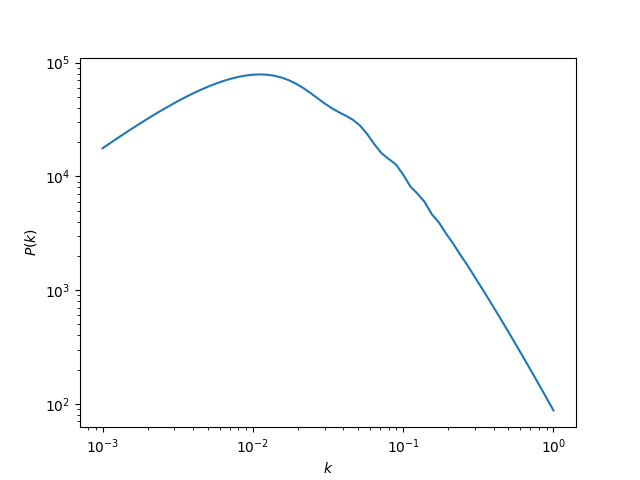

In [12]:
fig, ax = plt.subplots()

ax.plot(kmodes, Pkm, label='delta_m')
ax.loglog()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$P(k)$')